# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
# your code here

def dice(n):
    rolls = []
    for i in range(n):
        value = random.randint(1, 6)
        rolls.append(value)
    return rolls

data = pd.DataFrame(dice(10), columns = ['number'])

#data

#### 2.- Plot the results sorted by value.

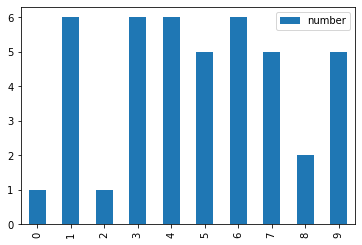

In [5]:
# your code here
data.plot(kind = 'bar')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

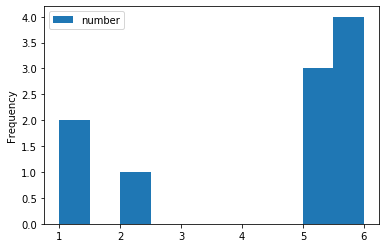

In [7]:
# your code here
data.plot(kind = 'hist')
plt.show()

In [8]:
"""
On the first graph you have the index as rows and the value as columns, and on the second one you have the value as
columns and the rows the amount of times that value came out.

"""

'\nOn the first graph you have the index as rows and the value as columns, and on the second one you have the value as\ncolumns and the rows the amount of times that value came out.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here

def mean(col):
    return col.sum()/col.count()

In [19]:
np.mean(data)

number    4.3
dtype: float64

In [20]:
mean(data['number'])

4.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [21]:
# your code here
pd.value_counts(data['number']).sort_index()

1    2
2    1
5    3
6    4
Name: number, dtype: int64

In [22]:
mean(data['number'])

4.3

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [23]:
# your code here
def median(col):
    n = col.count()
    index = n // 2 
    if n % 2 != 0: #1
        return sorted(col)[ındex]
    else: #2
        return sum(sorted(col)[index - 1 : index + 1]) / 2
np.median(data)

5.0

In [24]:
np.median(data['number'])

5.0

In [ ]:
"""
We start by finding the middle element, this differs because depends if the column as even or odd numbers.
Then we code the option for the even (#2) and for the odd(#1)
"""

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [25]:
# your code here

def quartiles(col):
    n = col.count()

    
    index_quart = (n // 2) // 2
    if (n // 2) % 2 != 0:
        print('Q1 is ', sorted(col)[index_quart])     
    else:
        print('Q1 is ', sum(sorted(col)[index_quart - 1 : index_quart + 1]) / 2)
       
    
    index = n // 2    
    if n % 2 != 0:
        print('Q2 is ', sorted(col)[index])
    else:
        print('Q2 is ', sum(sorted(col)[index - 1 : index + 1]) / 2)
        
    
    index_quart = int((n // 2) * 1.5)
    if ((n // 2)) % 2 != 0:
        print('Q3 is ', sorted(col)[index_quart])     
    else:
        print('Q3 is ', sum(sorted(col)[index_quart - 1 : index_quart + 1]) / 2)

In [26]:
quartiles(data['number'])

Q1 is  2
Q2 is  5.0
Q3 is  6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [28]:
# your code here
dice = pd.read_csv('roll_the_dice_hundred.csv')
dice.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


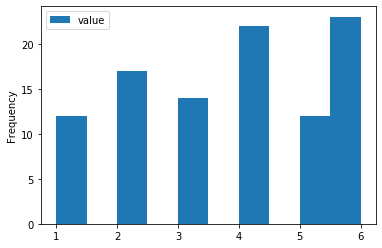

In [29]:
dice.plot(x = 'roll', y = 'value', kind = 'hist')
plt.show()

In [ ]:
#By doing this I'm able to see that theres more frequency towards the higher numbers

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [32]:
# your code here

mean(dice['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [31]:
# your code here

pd.value_counts(dice['value']).sort_index()

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

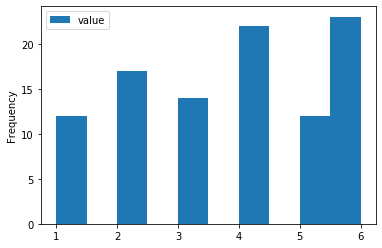

In [33]:
# your code here

dice.plot(x = 'roll', y = 'value', kind = 'hist')
plt.show()

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [34]:
# your code here

roll_thousand = pd.read_csv('roll_the_dice_thousand.csv')
roll_thousand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


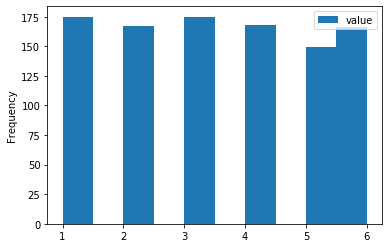

In [35]:
roll_thousand.plot(x = 'roll', y = 'value', kind = 'hist')
plt.show()

In [ ]:
"""
We are able to see that the values became more constant, meaning that they tend to all have the samme probability (1/&)
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [36]:
# your code here

pop = pd.read_csv('ages_population.csv')
pop.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


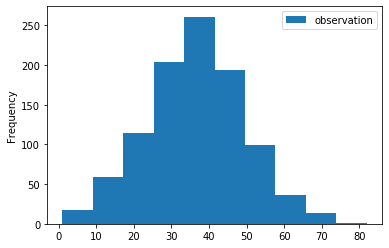

In [37]:
pop.plot(kind = 'hist')
plt.show()

In [ ]:
"""
We can see that the std looks to be around 10 and the mean will be between 30-40 range
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [38]:
# your code here

print(mean(pop['observation']))
print(np.std(pop['observation']))

36.56
12.81008977329979


In [ ]:
"""
It appears that I wasn't far off eheh :)
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [39]:
# your code here

pop2 = pd.read_csv('ages_population2.csv')
pop2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


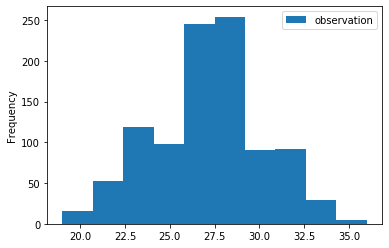

In [40]:
pop2.plot(kind = 'hist')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [42]:
"""
Yes, there seems to be a lower dispersion between the values compared to the before graph.
"""

'\nYes, there seems to be a lower dispersion between the values compared to the before graph.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [43]:
# your code here

print(mean(pop2['observation']))
print(np.std(pop2['observation']))

27.155
2.9683286543103704


In [44]:
"""
We can observe a lower mean and lower std
"""

'\nWe can observe a lower mean and lower std\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [45]:
# your code here

pop3 = pd.read_csv('ages_population3.csv')
pop3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [47]:
# your code here

print(mean(pop3['observation']))
print(np.std(pop3['observation']))

41.989
16.136631587788084


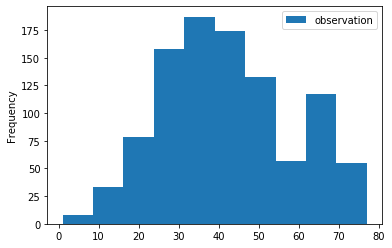

In [48]:
pop3.plot(kind = 'hist')
plt.show()

In [49]:
"""
We can see that the data is more BIAS to the right 
"""

'\nWe can see that the data is more BIAS to the right \n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [50]:
# your code here

print(mean(pop3['observation']))
print(pop3['observation'].quantile(0.25))
print(pop3['observation'].quantile(0.5))
print(pop3['observation'].quantile(0.75))
print(pop3['observation'].quantile(1))

41.989
30.0
40.0
53.0
77.0


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [51]:
# your code here

print(pop3['observation'].quantile(0))
print(pop3['observation'].quantile(0.1))
print(pop3['observation'].quantile(0.9))

1.0
22.0
67.0


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""